In [1]:
import numpy as np
import pandas as pd

In [207]:
iris = pd.read_csv("iris.csv")
print(iris.shape)
iris.head()

(150, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


## 相关矩阵的特征值分解算法

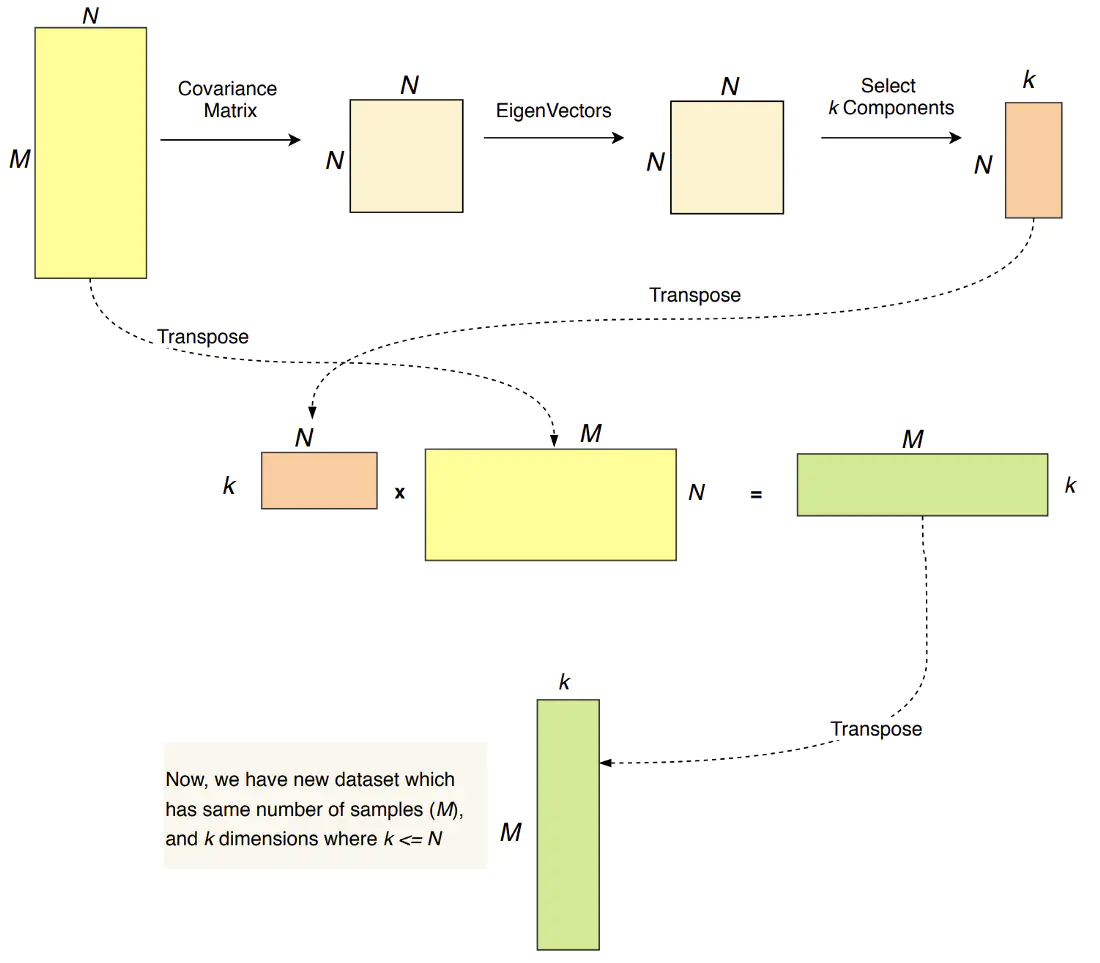

In [225]:
def PCA(X, var_rate = 0.8): # X为样本数据矩阵，var_rate为累计方差贡献率要求
    
    #中心化
    X = X - X.mean(axis=0)
    
    #计算协方差矩阵C
    C = np.cov(X, rowvar=False) # rowvar=False：不以行，而以列为变量
    
    #计算特征值λ和特征向量ξ
    λ, ξ = np.linalg.eig(C)
    eig_dic = {}
    for i in range(len(λ)):
        eig_dic[λ[i]] = ξ[:, i]
        
    #按特征值从大到小的顺序选择k个特征值和特征向量作为样本主成分，满足累计方差贡献率要求
    λ = sorted(λ, reverse=True)
    k = len(λ)
    var_total = sum(λ)
    for i in range(len(λ)):
        λ_rate = sum(λ[j] for j in range(i + 1)) / var_total
        if λ_rate >= var_rate:
            k = i + 1
            break
    eig_selected = []
    for i in range(k):
        eig_selected.append(eig_dic[λ[i]])
    
    #计算新的样本数据矩阵
    eig_selected_T = np.transpose(eig_selected)
    X_T = np.transpose(X)
    X_PCA_T = np.matmul(eig_selected, X_T)
    X_PCA = np.transpose(X_PCA_T)
    
    return X_PCA
    

In [226]:
X = np.array(iris.drop(['Species'], axis=1))
var_rate = 0.95
X_PCA = PCA(X, var_rate)
X_PCA

array([[ 2.15873837,  0.21832553],
       [-0.70708128,  1.00842476],
       [ 0.51938325,  1.19135169],
       [-2.67384469,  0.1066917 ],
       [-2.19907796, -0.87924409],
       [-2.99829644,  0.33430757],
       [-2.41007734, -0.41808001],
       [ 1.92245088, -0.40927118],
       [ 0.92757294, -0.46823621],
       [-2.54323491, -0.44003175],
       [-0.01019007,  0.72057487],
       [ 1.46406132, -0.50418983],
       [-2.64354322, -1.1861949 ],
       [-2.27989736, -0.74778271],
       [ 3.48876538, -1.17154454],
       [ 1.09522371, -0.28389121],
       [ 2.56332271, -0.2759745 ],
       [ 3.39687992, -0.54716805],
       [ 1.90474358, -0.11881899],
       [-2.38386932, -1.34475434],
       [ 2.27585365, -0.33338653],
       [ 2.12285398,  0.21085488],
       [-2.6225262 , -0.81808967],
       [ 1.77964011,  0.50146479],
       [ 2.3875644 , -0.46251925],
       [-2.56239095, -0.37468456],
       [ 0.22887905,  0.40225762],
       [ 1.38966613,  0.28288671],
       [ 0.58727485,

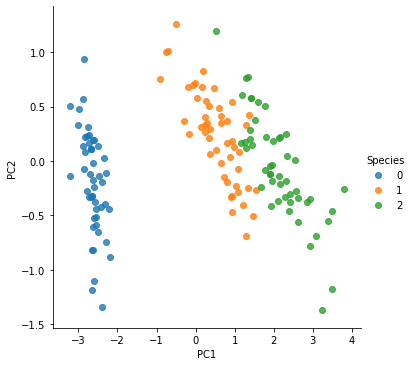

In [227]:
import seaborn as sns
%matplotlib inline

df = pd.DataFrame(data=X_PCA, columns=['PC1', 'PC2'])
df['Species'] = pd.Series(iris.Species)

sns.lmplot(x='PC1', y='PC2', data=df, hue='Species', fit_reg=False, legend=True)

## 用sklearn的PCA模块验证

In [214]:
from sklearn.decomposition import PCA as PCApack
X_PCApack =PCApack(n_components=2).fit(X).transform(X)
X_PCApack

array([[ 2.15873837, -0.21832553],
       [-0.70708128, -1.00842476],
       [ 0.51938325, -1.19135169],
       [-2.67384469, -0.1066917 ],
       [-2.19907796,  0.87924409],
       [-2.99829644, -0.33430757],
       [-2.41007734,  0.41808001],
       [ 1.92245088,  0.40927118],
       [ 0.92757294,  0.46823621],
       [-2.54323491,  0.44003175],
       [-0.01019007, -0.72057487],
       [ 1.46406132,  0.50418983],
       [-2.64354322,  1.1861949 ],
       [-2.27989736,  0.74778271],
       [ 3.48876538,  1.17154454],
       [ 1.09522371,  0.28389121],
       [ 2.56332271,  0.2759745 ],
       [ 3.39687992,  0.54716805],
       [ 1.90474358,  0.11881899],
       [-2.38386932,  1.34475434],
       [ 2.27585365,  0.33338653],
       [ 2.12285398, -0.21085488],
       [-2.6225262 ,  0.81808967],
       [ 1.77964011, -0.50146479],
       [ 2.3875644 ,  0.46251925],
       [-2.56239095,  0.37468456],
       [ 0.22887905, -0.40225762],
       [ 1.38966613, -0.28288671],
       [ 0.58727485,

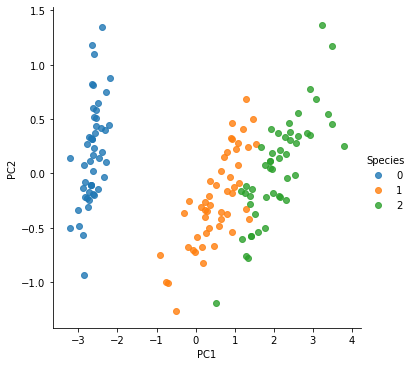

In [215]:
df = pd.DataFrame(data=X_PCApack, columns=['PC1', 'PC2'])
df['Species'] = pd.Series(iris.Species)

sns.lmplot(x='PC1', y='PC2', data=df, hue='Species', fit_reg=False, legend=True)

## 两种方法得到的PC2数据互为相反数